In [25]:
import time

import nibabel as nib

from nilearn import plotting
from nilearn.datasets import load_mni152_template
from nilearn.image import resample_img

import matplotlib.pyplot as plt
import numpy as np
import os

from nipype.interfaces import fsl
from numba import njit

from patch_utils import get_all_patches_and_labels, get_only_patches, get_image_patches

%matplotlib inline

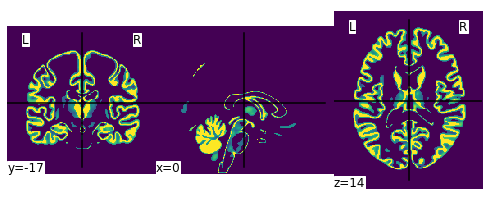

In [26]:
gray_matter_template = nib.load('./MNI152_T1_1mm_brain_gray.nii.gz')
plotting.plot_img(gray_matter_template)

gmpm = gray_matter_template.get_fdata()

In [56]:
FLIRT_MRI_FOLDER = './flirt_brains/'
FLIRT_MASK_FOLDER = './flirt_masks/'

list_of_tensors = []
list_of_labels = []
for i, input_img_name in enumerate(sorted(os.listdir(FLIRT_MRI_FOLDER))):
    if 'restore' not in input_img_name:
        continue

    print(f'Doing {i+1} image:', input_img_name)
    number = input_img_name.split('_')[0]
    havefcd = input_img_name.split('_')[2]
    input_mask_name = f'{havefcd}_{number}_1_flirt.nii.gz'
    have_mask = os.path.isfile(os.path.join(FLIRT_MASK_FOLDER, input_mask_name))
    
    #ignoring files without mask, they are useless
    if have_mask:
        X, y = get_image_patches(os.path.join(FLIRT_MRI_FOLDER, input_img_name), 
                                 os.path.join(FLIRT_MASK_FOLDER, input_mask_name), h=16, w=32)
    list_of_tensors.append(X)
    list_of_labels.append(y)

Doing 2 image: 0_1_fcd_flirt_restore.nii.gz
Doing 5 image: 0_1_nofcd_flirt_restore.nii.gz
Doing 8 image: 10_1_fcd_flirt_restore.nii.gz
Doing 11 image: 10_1_nofcd_flirt_restore.nii.gz
Doing 14 image: 11_1_fcd_flirt_restore.nii.gz
Doing 17 image: 11_1_nofcd_flirt_restore.nii.gz
Doing 20 image: 12_1_fcd_flirt_restore.nii.gz
Doing 23 image: 12_1_nofcd_flirt_restore.nii.gz
Doing 26 image: 13_1_fcd_flirt_restore.nii.gz
Doing 29 image: 13_1_nofcd_flirt_restore.nii.gz
Doing 32 image: 14_1_fcd_flirt_restore.nii.gz
Doing 35 image: 14_1_nofcd_flirt_restore.nii.gz
Doing 38 image: 1_1_fcd_flirt_restore.nii.gz
Doing 41 image: 1_1_nofcd_flirt_restore.nii.gz
Doing 44 image: 2_1_fcd_flirt_restore.nii.gz
Doing 47 image: 2_1_nofcd_flirt_restore.nii.gz
Doing 50 image: 3_1_fcd_flirt_restore.nii.gz
Doing 53 image: 3_1_nofcd_flirt_restore.nii.gz
Doing 56 image: 4_1_fcd_flirt_restore.nii.gz
Doing 59 image: 4_1_nofcd_flirt_restore.nii.gz
Doing 62 image: 5_1_fcd_flirt_restore.nii.gz
Doing 65 image: 5_1_nofcd_fl

In [58]:
FLIRT_MRI_FOLDER = './flirt_brains/'
FLIRT_MASK_FOLDER = './flirt_masks/'
PATCH_FCD_TENSORS = './fcd_batches/'
PATCH_FCD_LABELS = './fcd_labels/'

os.makedirs(PATCH_FCD_TENSORS, exist_ok=True)
os.makedirs(PATCH_FCD_LABELS, exist_ok=True)


j = 0
for i, input_img_name in enumerate(sorted(os.listdir(FLIRT_MRI_FOLDER))):
    if 'restore' not in input_img_name:
        continue

    print(f'Saving {i+1} image:', input_img_name)
    number = input_img_name.split('_')[0]
    havefcd = input_img_name.split('_')[2]
    input_mask_name = f'{havefcd}_{number}_1_flirt.nii.gz'
    have_mask = os.path.isfile(os.path.join(FLIRT_MASK_FOLDER, input_mask_name))
    
    if have_mask:
        print(j)
        np.save(os.path.join(PATCH_FCD_TENSORS, f'{havefcd}_{number}_tensor'), list_of_tensors[j])
        np.save(os.path.join(PATCH_FCD_LABELS, f'{havefcd}_{number}_label'), list_of_labels[j])
        j += 1
    else:
        continue



Doing 2 image: 0_1_fcd_flirt_restore.nii.gz
0
Doing 5 image: 0_1_nofcd_flirt_restore.nii.gz
Doing 8 image: 10_1_fcd_flirt_restore.nii.gz
1
Doing 11 image: 10_1_nofcd_flirt_restore.nii.gz
Doing 14 image: 11_1_fcd_flirt_restore.nii.gz
2
Doing 17 image: 11_1_nofcd_flirt_restore.nii.gz
Doing 20 image: 12_1_fcd_flirt_restore.nii.gz
3
Doing 23 image: 12_1_nofcd_flirt_restore.nii.gz
Doing 26 image: 13_1_fcd_flirt_restore.nii.gz
4
Doing 29 image: 13_1_nofcd_flirt_restore.nii.gz
Doing 32 image: 14_1_fcd_flirt_restore.nii.gz
5
Doing 35 image: 14_1_nofcd_flirt_restore.nii.gz
Doing 38 image: 1_1_fcd_flirt_restore.nii.gz
6
Doing 41 image: 1_1_nofcd_flirt_restore.nii.gz
Doing 44 image: 2_1_fcd_flirt_restore.nii.gz
7
Doing 47 image: 2_1_nofcd_flirt_restore.nii.gz
Doing 50 image: 3_1_fcd_flirt_restore.nii.gz
8
Doing 53 image: 3_1_nofcd_flirt_restore.nii.gz
Doing 56 image: 4_1_fcd_flirt_restore.nii.gz
9
Doing 59 image: 4_1_nofcd_flirt_restore.nii.gz
Doing 62 image: 5_1_fcd_flirt_restore.nii.gz
10
Doing

In [74]:
CONTROL_FOLDER = './fcd_classification_bank/'
CONTROL_FLIRT_FOLDER = './control_flirt/'
PATCH_CONTROLS_TENSORS_FOLDER = './control_batches/' 
PATCH_CONTROLS_LABELS_FOLDER = './control_labels/'


list_of_control_tensors = []
list_of_control_labels = []

for i, input_img_name in enumerate(sorted(os.listdir(CONTROL_FLIRT_FOLDER))):
    if 'restore' not in input_img_name or 'bad' in input_img_name:
        continue
    print(f'Doing {i+1} image:', input_img_name)
    
    name = 'HCP' if 'HCP' in input_img_name else 'LA5'
    if name == 'HCP':
        number = input_img_name.split('_')[4]
    else:
        number = input_img_name.split('-')[1][:5]
        
    X, y = get_image_patches(os.path.join(CONTROL_FLIRT_FOLDER, input_img_name), None, h=16, w=32)

    list_of_control_tensors.append(X)
    list_of_control_labels.append(y)
    
    np.save(os.path.join(PATCH_CONTROLS_TENSORS_FOLDER, f'{name}_{number}_tensor.npy'), list_of_control_tensors[-1])
    np.save(os.path.join(PATCH_CONTROLS_LABELS_FOLDER, f'{name}_{number}_label.npy'), list_of_control_labels[-1])


Doing 11 image: flirt_HCP_T1_fs6_101309_norm_restore.nii.gz
Doing 14 image: flirt_HCP_T1_fs6_101410_norm_restore.nii.gz
Doing 17 image: flirt_HCP_T1_fs6_101915_norm_restore.nii.gz
Doing 20 image: flirt_HCP_T1_fs6_102008_norm_restore.nii.gz
Doing 23 image: flirt_HCP_T1_fs6_102109_norm_restore.nii.gz
Doing 26 image: flirt_HCP_T1_fs6_102311_norm_restore.nii.gz
Doing 29 image: flirt_HCP_T1_fs6_102513_norm_restore.nii.gz
Doing 34 image: flirt_LA5_freesurfer_sub-11019_norm_restore.nii.gz
Doing 39 image: flirt_LA5_freesurfer_sub-11044_norm_restore.nii.gz
Doing 44 image: flirt_LA5_freesurfer_sub-11052_norm_restore.nii.gz
Doing 47 image: flirt_LA5_freesurfer_sub-11059_norm_restore.nii.gz
Doing 50 image: flirt_LA5_freesurfer_sub-11061_norm_restore.nii.gz
Doing 53 image: flirt_LA5_freesurfer_sub-11062_norm_restore.nii.gz
Doing 56 image: flirt_LA5_freesurfer_sub-11066_norm_restore.nii.gz
Doing 59 image: flirt_LA5_freesurfer_sub-11067_norm_restore.nii.gz
Doing 63 image: flirt_LA5_freesurfer_sub-110